In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
#Traget distribution
def f(x):
    z = 24.44321494051954
    
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x/7)**2)**0.5/z
    elif abs(x) > 1:
        return ((3 - abs(x))/2 - 3/7*10**0.5*((3-x**2+2*abs(x))**0.5 - 2))/z
    elif abs(x) > 0.75:
        return (9-8*abs(x))/z
    elif abs(x) > 0.5:
        return (3*abs(x) + 0.75) / z
    else:
        return 2.25/z

In [3]:
def samples(steps = 100000):
    
    #list of samples
    samples = []
    
    #starting x
    x = np.random.normal(0, 2)
    
    #run the simulation the required steps
    for i in range(1, steps):
        
        #New proposed state from normal centered at old x
        y = np.random.normal(x, 2)
        
        #Find the probability of accepting the proposed state
        p = min(1, f(y)/f(x))
        
        #switch with probability p
        if p >= np.random.random():
            x = y
        
        #Store only the 100th samples to reduce the dependency
        if i%100 == 0:
            samples.append(x)
        
    return samples
    
    

In [4]:
sample = samples(steps = 100000)

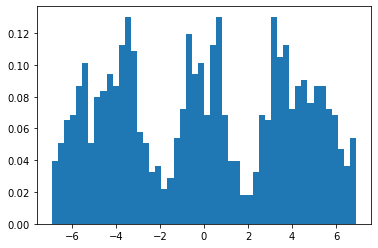

In [5]:
#plot histogram 
plt.hist(sample, bins = 50, density = True)
plt.show()